In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# 2. Load Dataset
df = pd.read_csv('dataset.csv')  

In [3]:
# 3. Quick Overview
print(df.head())
print(df.info())

                              name  \
0     2024 Jeep Wagoneer Series II   
1  2024 Jeep Grand Cherokee Laredo   
2         2024 GMC Yukon XL Denali   
3       2023 Dodge Durango Pursuit   
4            2024 RAM 3500 Laramie   

                                         description   make           model  \
0  \n      \n        Heated Leather Seats, Nav Sy...   Jeep        Wagoneer   
1  Al West is committed to offering every custome...   Jeep  Grand Cherokee   
2                                                NaN    GMC        Yukon XL   
3  White Knuckle Clearcoat 2023 Dodge Durango Pur...  Dodge         Durango   
4  \n      \n        2024 Ram 3500 Laramie Billet...    RAM            3500   

   year    price                                             engine  \
0  2024  74600.0                            24V GDI DOHC Twin Turbo   
1  2024  50170.0                                                OHV   
2  2024  96410.0  6.2L V-8 gasoline direct injection, variable v...   
3  2023  468

In [4]:
# 4. Drop Unnecessary Columns or Handle Missing Values
df.drop(['description', 'name', 'engine'], axis=1, inplace=True)
df.dropna(inplace=True)

In [5]:
# 5. Feature Engineering
df['age'] = 2025 - df['year']
df.drop('year', axis=1, inplace=True)

In [6]:
# 6. Define Categorical and Numerical Features
cat_features = ['make', 'model', 'fuel', 'transmission', 'trim', 'body', 
                'exterior_color', 'interior_color', 'drivetrain']
num_features = ['cylinders', 'mileage', 'doors', 'age']

In [7]:
# 7. Encode Categorical Variables
df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [8]:
# 8. Prepare Features and Target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [9]:
# 9. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# 10. Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [12]:
# 11. Evaluate Model
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred)*100)

MAE: 3822.574614037447
R² Score: 87.73255088330923


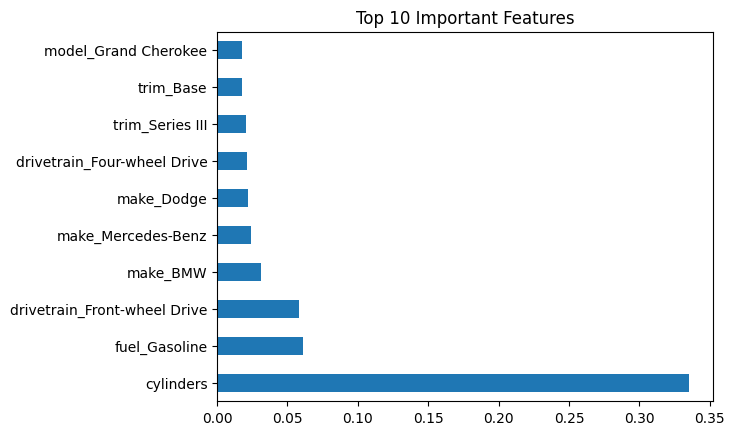

In [13]:
# 12. Feature Importance Plot
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()